In [1]:
from scipy import misc
%matplotlib inline

In [2]:
face = misc.imread('hw7_data/low-rank_data/face.jpg')
sky = misc.imread('hw7_data/low-rank_data/sky.jpg')

In [3]:
face.shape, sky.shape

((330, 280), (330, 280))

In [4]:
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt


In [5]:
face_u, face_s, face_v = linalg.svd(face, full_matrices = False)
sky_u, sky_s, sky_v = linalg.svd(sky, full_matrices = False)


In [6]:
def rank_n(s, n):
    cpy = np.copy(s)
    cpy[n:] = 0
    return cpy

Qa): rank-5, rank-20, rank-100 approximation on image face.jpg

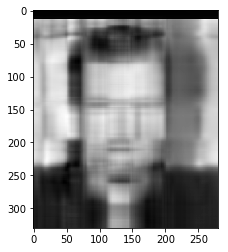

In [7]:
face_5 = np.matmul(np.matmul(face_u, np.diag(rank_n(face_s, 5))), face_v)

plt.imshow(face_5, cmap=plt.cm.gray)

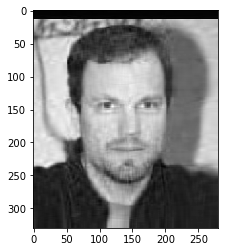

In [8]:
face_20 = np.matmul(np.matmul(face_u, np.diag(rank_n(face_s, 20))), face_v)

plt.imshow(face_20, cmap=plt.cm.gray)

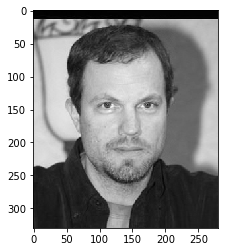

In [9]:
face_100 = np.matmul(np.matmul(face_u, np.diag(rank_n(face_s, 100))), face_v)

plt.imshow(face_100, cmap=plt.cm.gray)

Qb) Mean squared value

In [11]:
def MSE(m1, m2):
    m1 = np.reshape(m1, (m1.shape[0] * m1.shape[1],))
    m2 = np.reshape(m2, (m2.shape[0] * m2.shape[1],))
    return ((m1-m2) ** 2).mean()

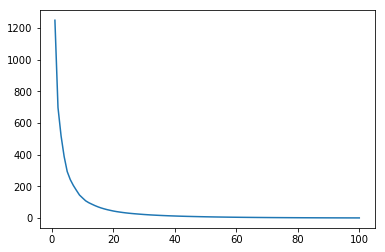

In [18]:
mse = []
for i in range(1, 101):
    e = MSE(face, np.matmul(np.matmul(face_u, np.diag(rank_n(face_s, i))), face_v))
    mse.append(e)
plt.plot(range(1, 101), mse)

Qc) rank-5, 20, 100 on sky

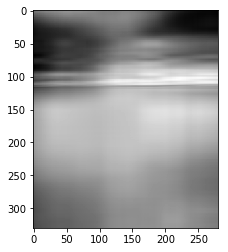

In [20]:
sky_5 = np.matmul(np.matmul(sky_u, np.diag(rank_n(sky_s, 5))), sky_v)

plt.imshow(sky_5, cmap=plt.cm.gray)

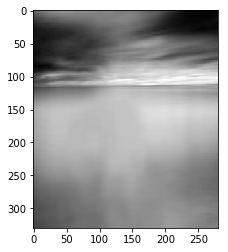

In [21]:
sky_20 = np.matmul(np.matmul(sky_u, np.diag(rank_n(sky_s, 20))), sky_v)

plt.imshow(sky_20, cmap=plt.cm.gray)

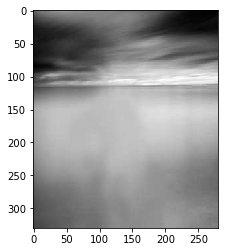

In [22]:
sky_100 = np.matmul(np.matmul(sky_u, np.diag(rank_n(sky_s, 100))), sky_v)

plt.imshow(sky_100, cmap=plt.cm.gray)

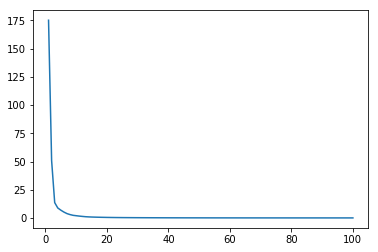

In [25]:
mse_s = []
for i in range(1, 101):
    e = MSE(sky, np.matmul(np.matmul(sky_u, np.diag(rank_n(sky_s, i))), sky_v))
    mse_s.append(e)
plt.plot(range(1, 101), mse_s)

Qd) least rank

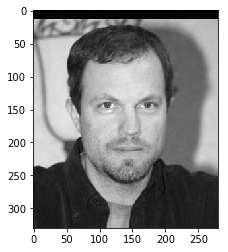

In [32]:
face_app = np.matmul(np.matmul(face_u, np.diag(rank_n(face_s, 60))), face_v)

plt.imshow(face_app, cmap=plt.cm.gray)

60 for face.

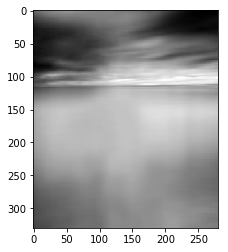

In [39]:
sky_app = np.matmul(np.matmul(sky_u, np.diag(rank_n(sky_s, 15))), sky_v)

plt.imshow(sky_app, cmap=plt.cm.gray)

15 for sky.

The difference is the sky image is relatively simple in stucture, therefore the largest few eigenvalues captures the most variation of the image. The face image is relatively more complex. One other way to see that is to look at the plot of MSE: we observe that the plot is hardly going down after 60 for face but 15 for sky.